c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Results:
                 Model  Accuracy  Precision    Recall  F1-score       AUC
0  Logistic Regression  0.896341   0.899046  0.896341  0.896043  0.940923
1        Decision Tree  0.987805   0.987805  0.987805  0.987805  0.987798
2        Random Forest  1.000000   1.000000  1.000000  1.000000  1.000000
3                  SVM  0.908537   0.909930  0.908537  0.908383  0.955952


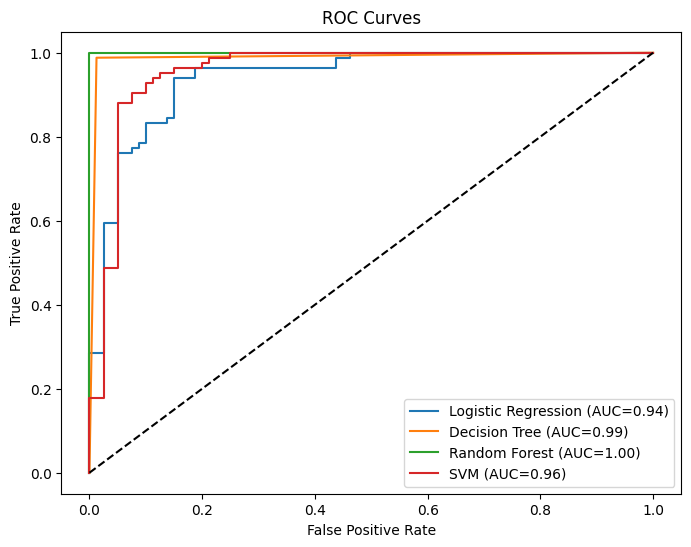

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
import pandas as pd

x_train_reduced = 'E:/Heart_Disease_Project/data/x_train_reduced.csv'
y_train = 'E:/Heart_Disease_Project/data/y_train.csv'

x_train_reduced = pd.read_csv(x_train_reduced)
y_train = pd.read_csv(y_train)

# 1. Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    x_train_reduced, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# 2. Initialize Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)  # enable probability for ROC
}

results = []

# 3. Train & Evaluate
plt.figure(figsize=(8,6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # AUC
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "AUC": auc
    })
    
    # ROC Curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

# 4. Results Table
results_df = pd.DataFrame(results)
print("\nClassification Results:")
print(results_df)

# 5. ROC Curve Visualization
plt.plot([0,1], [0,1], 'k--')  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.show()

# Save results
results_df.to_csv("classification_results.csv", index=False)
